## Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

**Anomaly Detection** refers to identifying data points, events, or observations that deviate significantly from the norm or expected behavior. These anomalies can indicate critical incidents, such as fraud, network intrusions, or equipment failures.

### Types of Anomalies:
- **Point Anomalies**: A single data point is anomalous compared to the rest.
  - *Example*: A sudden spike in temperature in a weather dataset.
- **Contextual Anomalies**: A data point is anomalous in a specific context but not otherwise.
  - *Example*: High electricity usage at night might be normal in winter but anomalous in summer.
- **Collective Anomalies**: A group of data points is anomalous together, even if individual points are not.
  - *Example*: A sequence of low network traffic during peak hours.

---

## Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

| Algorithm            | Approach                                                                 | Suitable Use Cases                                  |
|----------------------|--------------------------------------------------------------------------|-----------------------------------------------------|
| Isolation Forest     | Randomly partitions data to isolate anomalies; anomalies are easier to isolate. | High-dimensional datasets, scalable anomaly detection |
| DBSCAN               | Density-based clustering; points in low-density regions are anomalies.   | Spatial data, noise detection in clusters            |
| Local Outlier Factor | Measures local deviation of density; compares each point to its neighbors. | Detecting subtle anomalies in dense datasets         |

---

## Question 3: What are the key components of a Time Series? Explain each with one example.

- **Trend**: Long-term increase or decrease in the data.
  - *Example*: Rising global temperatures over decades.
- **Seasonality**: Regular pattern repeating over fixed periods.
  - *Example*: Increased ice cream sales during summer.
- **Cyclicality**: Irregular fluctuations not tied to a fixed period.
  - *Example*: Economic boom and recession cycles.
- **Noise/Residuals**: Random variation not explained by other components.
  - *Example*: Sudden stock price changes due to news.

---

## Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

**Stationary Time Series** has constant mean, variance, and autocorrelation over time.

### Testing for Stationarity:
- **Visual Inspection**: Plot the series and check for trends or changing variance.
- **Statistical Tests**: Augmented Dickey-Fuller (ADF) test, KPSS test.

### Transformations:
- **Differencing**: Subtract previous value from current value.
- **Log Transformation**: Stabilizes variance.
- **Detrending**: Remove trend component using regression or decomposition.

---

## Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

| Model     | Structure                                      | Application                                           |
|-----------|------------------------------------------------|-------------------------------------------------------|
| AR        | Autoregressive: uses past values               | Time series with autocorrelation                      |
| MA        | Moving Average: uses past forecast errors      | Noise smoothing, short-term forecasting               |
| ARIMA     | Combines AR and MA with differencing           | Non-stationary series with trend                      |
| SARIMA    | Adds seasonal components to ARIMA              | Seasonal time series (e.g., monthly sales)            |
| SARIMAX   | SARIMA + exogenous variables                   | Time series influenced by external factors (e.g., weather) |



/tmp/ipython-input-832079501.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = pd.Series(data['value'].values, index=pd.date_range(start='1949-01', periods=len(data), freq='M'))


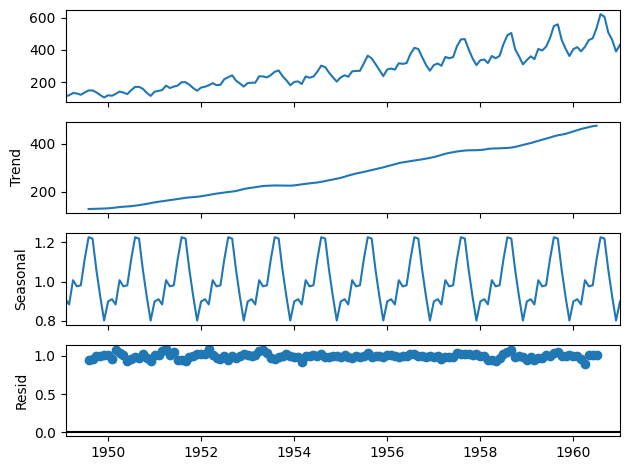

In [1]:
## Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset("AirPassengers", "datasets").data
ts = pd.Series(data['value'].values, index=pd.date_range(start='1949-01', periods=len(data), freq='M'))

# Decomposition
decomposition = seasonal_decompose(ts, model='multiplicative')
decomposition.plot()
plt.tight_layout()
plt.show()


In [ ]:
# Q7
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load sample NYC Taxi Fare dataset
df = pd.read_csv("nyc_taxi_fare.csv")  # Replace with actual path
X = df[['fare_amount', 'trip_distance']]

# Fit Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = clf.fit_predict(X)

# Plot anomalies
plt.figure(figsize=(8,6))
plt.scatter(X['fare_amount'], X['trip_distance'], c=df['anomaly'], cmap='coolwarm', s=10)
plt.xlabel('Fare Amount')
plt.ylabel('Trip Distance')
plt.title('Isolation Forest Anomaly Detection')
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


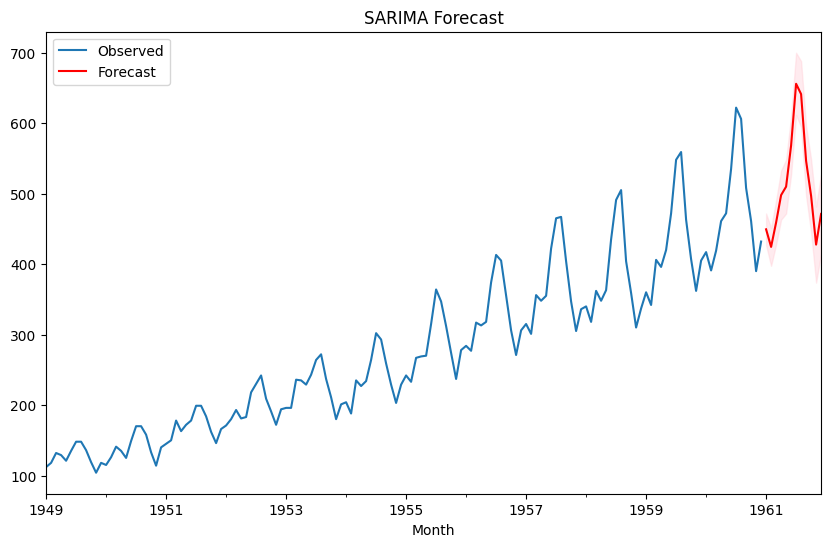

In [7]:
# Q8
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
data = pd.read_csv("/content/AirPassengers.csv", parse_dates=['Month'], index_col='Month')
ts = data['#Passengers']

# Fit SARIMA model
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=12)
pred_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(10,6))
ts.plot(label='Observed')
forecast.predicted_mean.plot(label='Forecast', color='red')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

In [9]:
# Q10
# Pseudocode for real-time workflow - This code is illustrative and not meant to be run directly as 'df_stream' is a placeholder for incoming data.

# 1. Data ingestion
# Use streaming tools like Apache Kafka or Spark Streaming to collect data every 15 minutes

# 2. Anomaly Detection
from sklearn.ensemble import IsolationForest
# Assume df_stream is the incoming batch
# clf = IsolationForest(contamination=0.01)
# df_stream['anomaly'] = clf.fit_predict(df_stream[['energy_usage']])

# 3. Forecasting
from statsmodels.tsa.statespace.sarimax import SARIMAX
# model = SARIMAX(df_stream['energy_usage'], order=(1,1,1), seasonal_order=(1,1,1,96))  # 96 = 15-min intervals/day
# results = model.fit()
# forecast = results.get_forecast(steps=96)

# 4. Monitoring
# Use dashboards (e.g., Grafana) to track forecast vs actual and anomaly flags

# 5. Business Impact
# Alerts for abnormal spikes/drops can trigger preventive maintenance or load balancing